In [1]:
# 1. 데이터 로드
import pandas as pd

# 데이터 로드
# df = pd.read_csv('simple_field.csv', encoding='utf-8')
df = pd.read_csv('field.csv', encoding='utf-8')

# 데이터 확인
df.tail(4)

,항목,대화
4976,신체학대_우려,Q: 주위 어른이나 가족들 중 나를 때렸던 사람이 있었어요? A: 예전에 아빠한테 ...
4977,트라우마_위험,Q: 잠잘 때 주로 어떤 꿈을 꾸나요? 악몽을 꾸나요? A: 네. 엄마가 사라지고 ...
4978,정서학대_우려,Q: 부모님이나 선생님 때문에 슬프거나 화가 난 적이 있나요? A: 네. Q: 누구...
4979,신체학대_우려,Q: 주위 어른이나 가족 중 나를 때린 적이 있는 사람이 있나요? A: 네. 아빠가...


In [2]:
# 2. 데이터 전처리 및 특성 추출
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 특성과 레이블 분리
X = df['대화']
y = df['항목']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Okt 형태소 분석기를 이용한 토크나이저 함수 정의
okt = Okt()


def okt_tokenizer(text):
    return okt.morphs(text)


# TF-IDF 벡터라이저를 이용하여 텍스트를 수치화
vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer, max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [3]:
# 3. 나이브 베이즈 모델 정의 및 학습
from sklearn.naive_bayes import MultinomialNB

# 모델 정의
model = MultinomialNB()

# 모델 학습
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [4]:
# 4. 모델 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_vectors)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼돈 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 추출
labels = model.classes_

Accuracy: 0.6295180722891566
F1 Score: 0.5373404378631785
Classification Report:
               precision    recall  f1-score   support

     가정폭력_우려       0.00      0.00      0.00        20
     가정폭력_위험       0.71      0.96      0.81        50
     가정폭력_주의       0.00      0.00      0.00         1
       방임_우려       0.50      1.00      0.67        60
       방임_위험       0.00      0.00      0.00        41
       방임_주의       0.00      0.00      0.00         1
      성학대_우려       0.00      0.00      0.00        19
      성학대_위험       0.53      1.00      0.69        34
     신체학대_우려       0.00      0.00      0.00        31
     신체학대_위험       0.63      1.00      0.77        85
     신체학대_주의       0.00      0.00      0.00         3
    자해/자살_우려       0.69      1.00      0.82        67
    자해/자살_위험       0.00      0.00      0.00        15
     정서학대_우려       0.63      1.00      0.77       134
     정서학대_위험       0.00      0.00      0.00        44
     정서학대_주의       0.00      0.00      0.00         8

/Users/jaewone/ENTER/envs/tf25/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaewone/ENTER/envs/tf25/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaewone/ENTER/envs/tf25/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


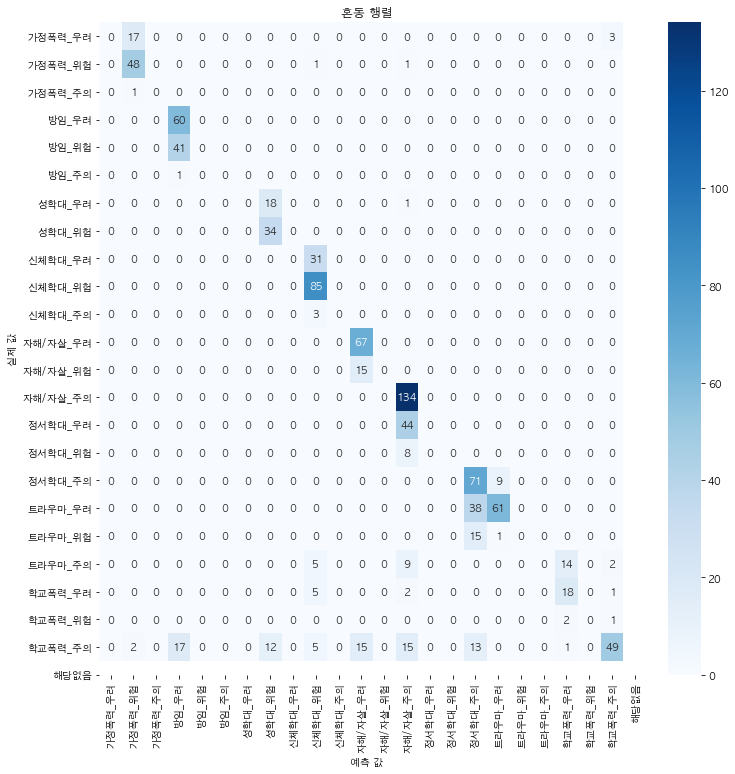

In [7]:
# 5. 결과 시각화
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 혼돈 행렬 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels,
            yticklabels=labels, cmap='Blues')
plt.ylabel('실제 값', weight='bold')
plt.xlabel('예측 값', weight='bold')
plt.title('혼동 행렬', weight='bold', size=12)
plt.show()